In [1]:
import pandas as pd

In [2]:
pd.__version__

'1.4.2'

In [3]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [5]:
len(df.columns)

19

In [6]:
df2 = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [7]:
len(df2.columns)

19

In [8]:
df['tpep_pickup_datetime'].dtypes

dtype('<M8[ns]')

In [9]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

In [10]:
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [11]:
df['trip_duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

In [12]:
df['trip_duration_minutes'] = df['trip_duration'].dt.total_seconds() / 60

In [13]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration,trip_duration_minutes
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,0 days 00:08:26,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,0 days 00:06:19,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,0 days 00:12:45,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,...,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,0 days 00:09:37,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,0 days 00:10:50,10.833333


In [14]:
std_dev = df['trip_duration_minutes'].std()
std_dev

42.594351241920904

In [15]:
total_records = len(df)
total_records

3066766

In [16]:
df['trip_duration_minutes'].describe()

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
25%      7.116667e+00
50%      1.151667e+01
75%      1.830000e+01
max      1.002918e+04
Name: trip_duration_minutes, dtype: float64

In [17]:
import matplotlib.pyplot as plt

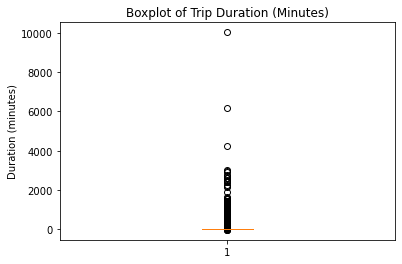

In [18]:
plt.boxplot(df['trip_duration_minutes'])
plt.title('Boxplot of Trip Duration (Minutes)')
plt.ylabel('Duration (minutes)')
plt.show()

In [19]:
df = df[df['trip_duration_minutes'] >= 0]

In [20]:
df = df[df['trip_duration_minutes'] <= 60]

In [21]:
removed = total_records - len(df)
percentage_removed =(removed/total_records)*100
print(f"Records removed: {removed} ({percentage_removed:.2f}%)")

Records removed: 24261 (0.79%)


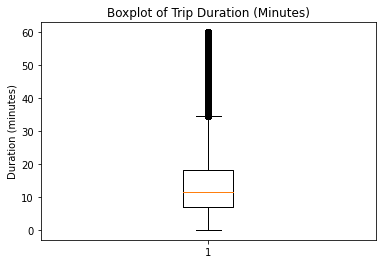

In [22]:
plt.boxplot(df['trip_duration_minutes'])
plt.title('Boxplot of Trip Duration (Minutes)')
plt.ylabel('Duration (minutes)')
plt.show()

In [23]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration,trip_duration_minutes
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,0 days 00:08:26,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,0 days 00:06:19,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,0 days 00:12:45,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,...,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,0 days 00:09:37,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,0 days 00:10:50,10.833333


In [27]:
df['DOLocationID'].unique()

array([141, 237, 238,   7,  79, 137, 143, 200, 236, 107,  68, 264,  33,
        61, 186,  48, 255, 239, 229, 116, 161, 164,  87, 232, 262,  75,
        36, 263, 140, 246, 231, 170,  43, 233,   4, 162, 224, 145, 125,
        24, 163, 114, 225, 211, 158,  42, 151, 261, 148,  13,  50, 133,
       188, 149,  95, 218, 234, 228, 212, 144, 166, 112,  90, 249,  25,
        97, 113,  45,  91, 142, 265,  88, 256, 243,  41, 193, 181, 257,
        94,  80, 195,  10, 194, 167, 127, 248,  89,  74, 223,  47,  40,
       202, 216, 129, 244,  17, 121,  39,  83,  82, 198, 136,  65, 171,
       196, 209,  37, 146, 191, 152, 226, 100, 197,  22, 179, 160, 235,
       168,  29, 260,  35, 189,  92, 130, 165, 132,  63, 252, 119, 185,
        67, 258,  76,  57, 138, 242, 126, 117,  54, 123, 213, 207,  49,
        18,  19, 219,  71, 177, 208,   3, 203, 147,   9,  14, 251, 169,
        52, 153, 106,  70, 122, 254, 205,  62, 155, 247, 220, 124,  56,
       259, 157,  15, 217,  77, 128, 174, 215,  64,  38,  51,  9

In [ ]:
list_of_dicts = df.to_dict('records')